# Titanic Survival Prediction (Task 2)

## Import Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

## Data Exploration

In [133]:
# Load the data
df = pd.read_csv('data/titanic_train.csv')

# Display the first 5 rows of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
# descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
# check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
# check the missing values in percentage
(df.isnull().mean() * 100).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

## Data Visualization (EDA)

Text(0, 0.5, 'Count')

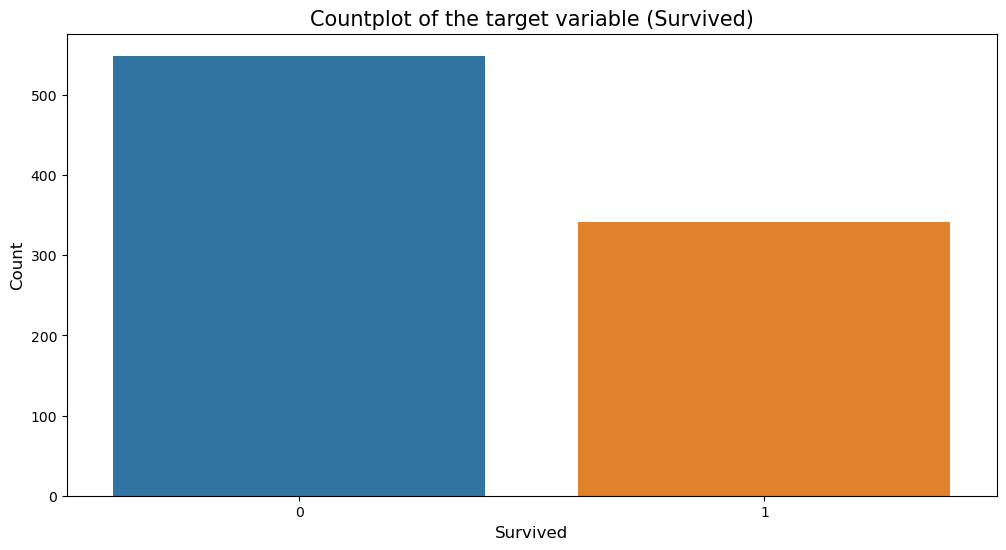

In [138]:
# Countplot of the target variable (Survived)
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=df)
plt.title('Countplot of the target variable (Survived)', fontsize=15)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

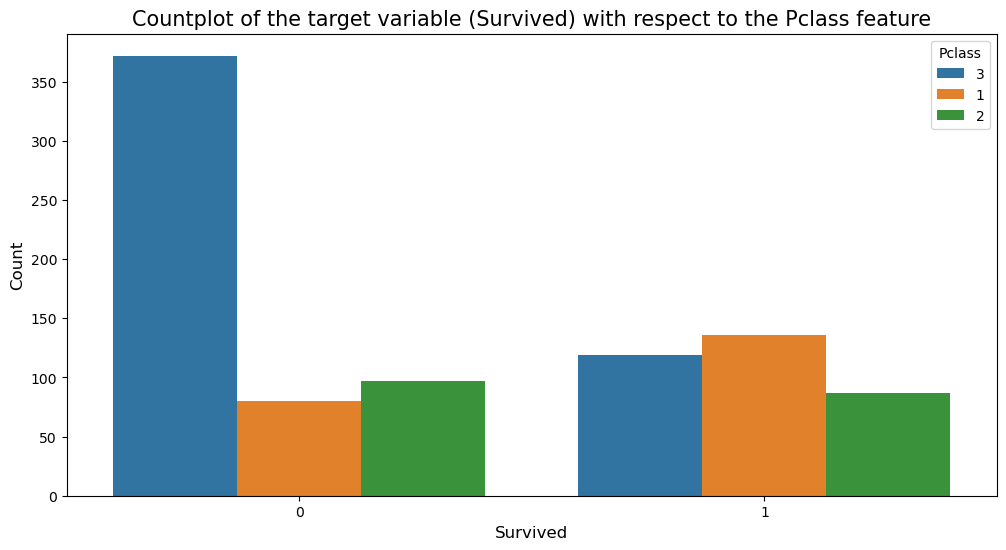

In [139]:
# Countplot of the target variable (Survived) with respect to the 'pclass' feature
plt.figure(figsize=(12, 6))
df['Pclass'] = df['Pclass'].astype(str)
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.title('Countplot of the target variable (Survived) with respect to the Pclass feature', fontsize=15)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

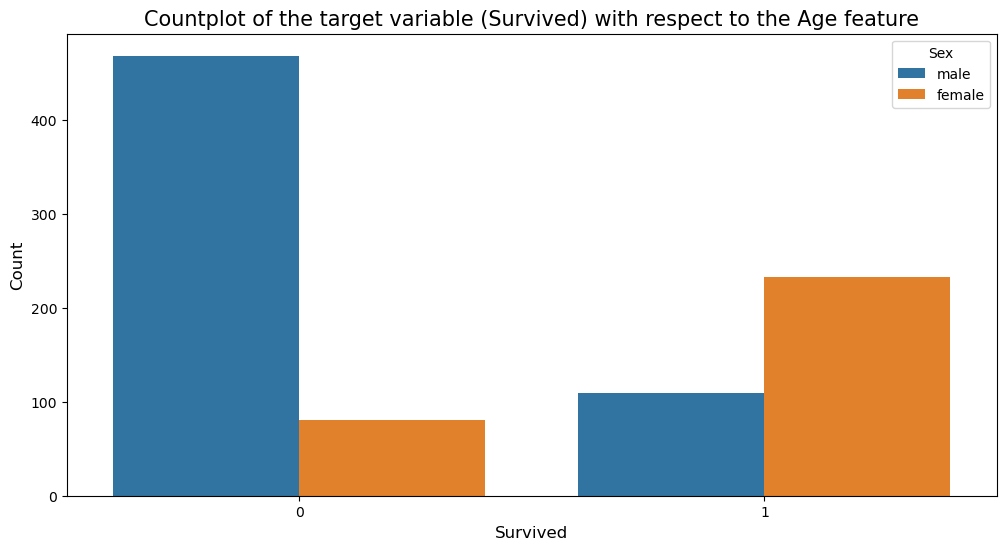

In [140]:
# countplot of the target variable (Survived) with respect to the 'Sex' feature
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=df, hue='Sex')
plt.title('Countplot of the target variable (Survived) with respect to the Age feature', fontsize=15)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

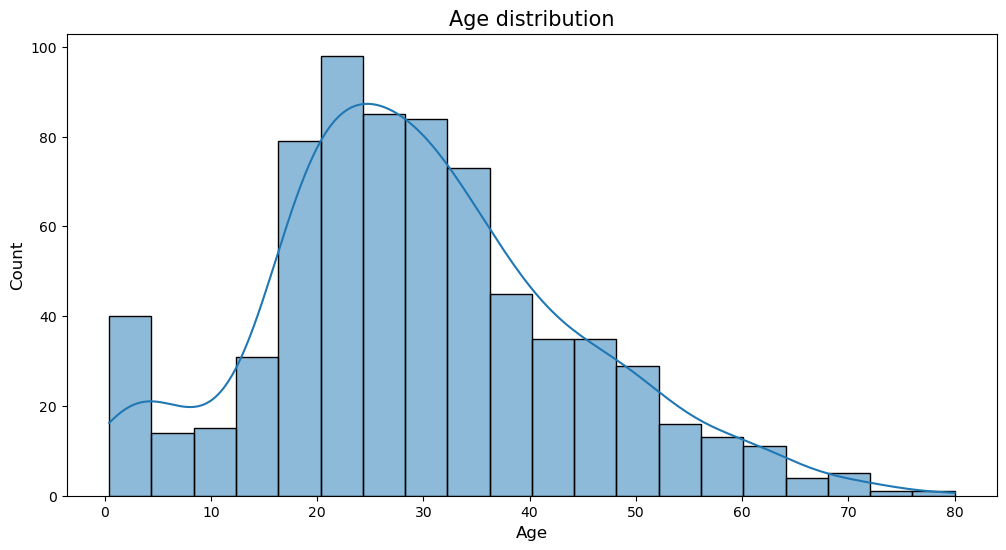

In [141]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age distribution', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

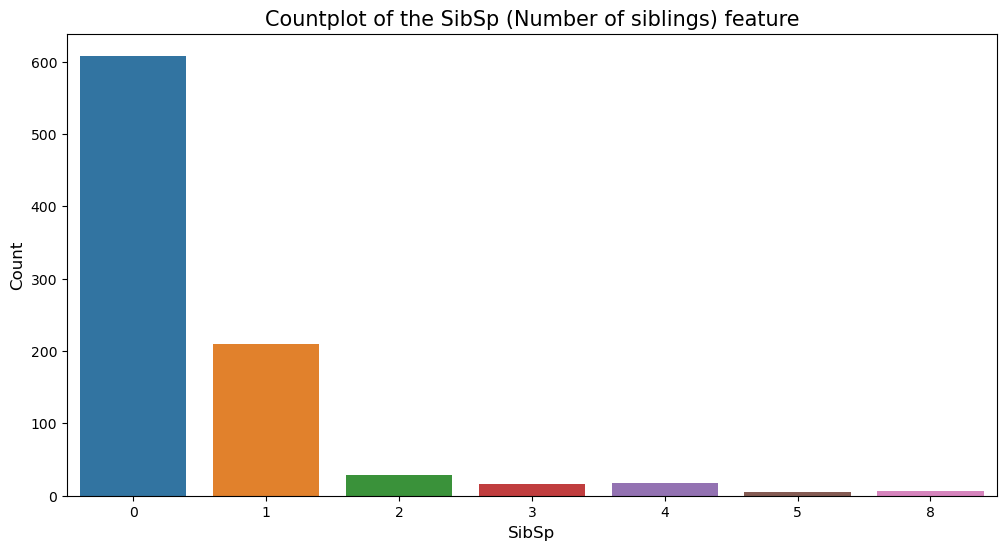

In [142]:
# countplot of the 'SibSp' (Number of siblings) feature
plt.figure(figsize=(12, 6))
sns.countplot(x='SibSp', data=df)
plt.title('Countplot of the SibSp (Number of siblings) feature', fontsize=15)
plt.xlabel('SibSp', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

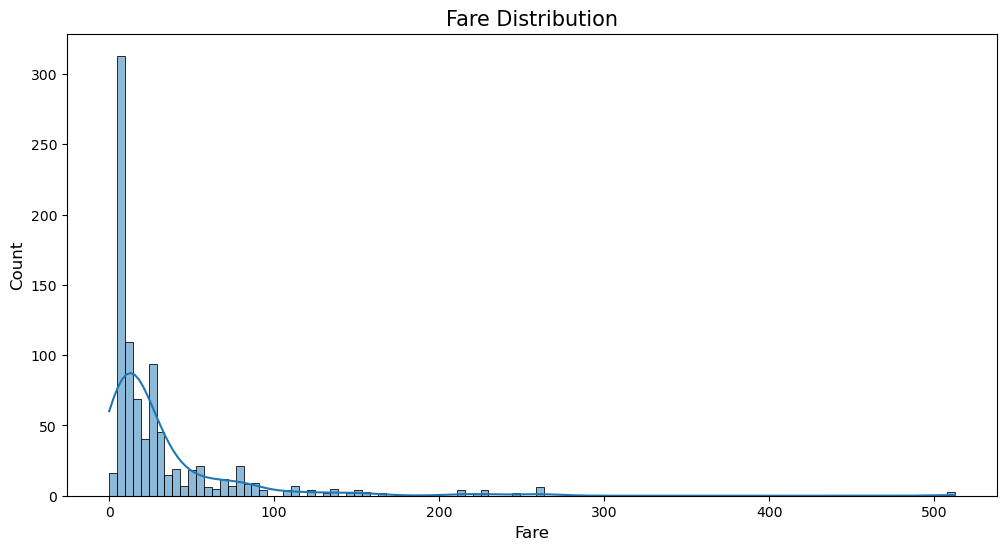

In [143]:
# Fare distribution
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Fare', kde=True)
plt.title('Fare Distribution', fontsize=15)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Coorelation between features (Without data preprocessing)')

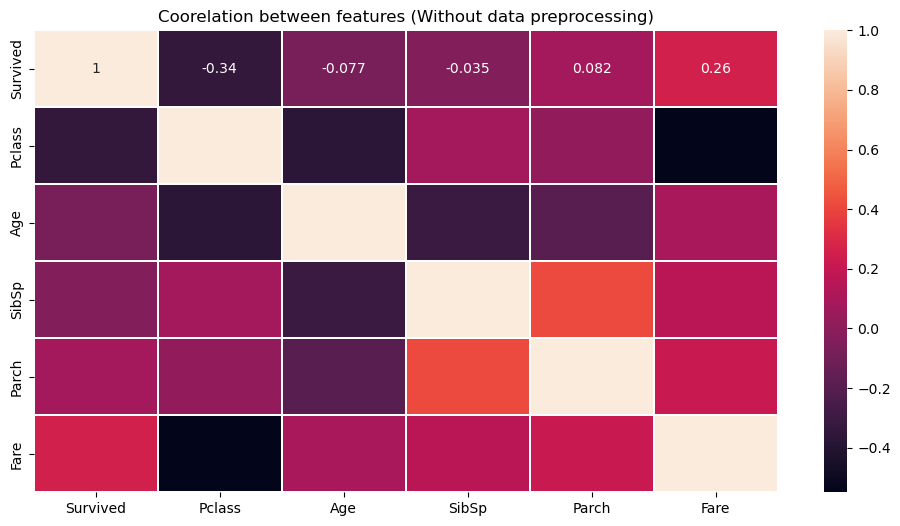

In [144]:
# heatmap
plt.figure(figsize=(12,6))
df_corr = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
sns.heatmap(data=df_corr.corr(), annot=True, linecolor='white', linewidths=0.2)
plt.title("Coorelation between features (Without data preprocessing)")

## Data Cleaning (Preprocessing)

### Handling Missing Values

Let's handle the missing values of 'Age' feature in dataframe.

One way of handling the missing values in 'Age' column to fill the mean age of all the passengers with respect to their passenger class.

Text(0.5, 1.0, 'Boxplot for Pclass vs Age')

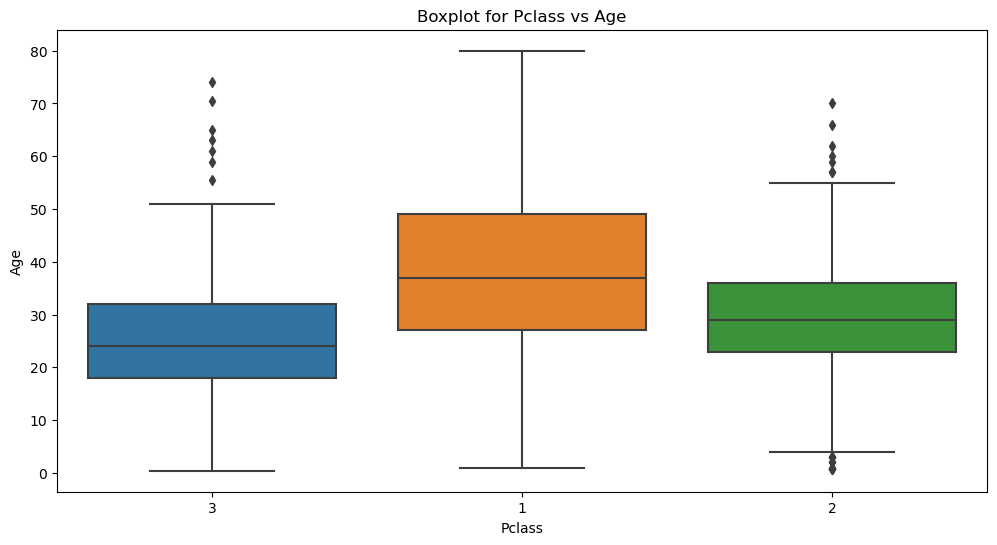

In [145]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Boxplot for Pclass vs Age')

So, according to the above plot we can do a quick analysis that, mean age for class 1 is approx. '37', class 2 is approx. '29' and class 3 is approx. '24'.

In [146]:
# let's make a function which fill the missing age value with their corresponding classes.

def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [147]:
# Apply the function
df['Age'] = df[['Age','Pclass']].apply(fill_age, axis=1)

In [148]:
# let's check the missing values in dataframe
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now, we have successfully filled the 'Age' column. It's time to deal with 'Cabin', but cabin have 77% missing values and we don't have any idea how to fill it's values. So, let's drop this entire column from dataframe.

In [149]:
df = df.drop('Cabin', axis=1)

In [150]:
# remove 2 null values from 'Embarked' column.
df = df.dropna(axis=0)

In [151]:
# 'Name' columns doesn't going to help us in our prediction. So, drop it also.
df = df.drop('Name', axis=1)

In [152]:
# let's check the missing values in dataframe
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### OneHot Encoding

In [153]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [154]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [155]:
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [156]:
df = df.drop(['Ticket', 'PassengerId'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Data Preprocessing 2 (Testing Dataset)

In [121]:
df_test = pd.read_csv('data/titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [158]:
df_test.isna().mean() * 100 

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [ ]:
# drop irrelevant columns
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'])

# drop null values
df_test = df_test.dropna(axis=0)

# apply fill_age() function to impute the missing values in age column
df_test['Age'] = df_test[['Age', 'Pclass']]